In [2]:
%pip install --upgrade azure-ai-vision-imageanalysis

   ---------------------------------------- 0.0/64.2 kB ? eta -:--:--
   ---------------------------------------- 64.2/64.2 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: azure-ai-vision-imageanalysis
    Found existing installation: azure-ai-vision-imageanalysis 1.0.0b1
    Uninstalling azure-ai-vision-imageanalysis-1.0.0b1:
      Successfully uninstalled azure-ai-vision-imageanalysis-1.0.0b1
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%%writefile -a "./.env"
VISION_ENDPOINT=
VISION_KEY=

Writing ./.env


In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential

# Set the values of your computer vision endpoint and computer vision key
# as environment variables:
try:
    endpoint = os.environ["VISION_ENDPOINT"]
    key = os.environ["VISION_KEY"]
except KeyError:
    print("Missing environment variable 'VISION_ENDPOINT' or 'VISION_KEY'")
    print("Set them before running this sample.")
    exit()

# Create an Image Analysis client
client = ImageAnalysisClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(key)
)

# Get a caption for the image. This will be a synchronously (blocking) call.
result = client.analyze_from_url(
    image_url="https://learn.microsoft.com/azure/ai-services/computer-vision/media/quickstarts/presentation.png",
    visual_features=[VisualFeatures.CAPTION, VisualFeatures.READ],
    gender_neutral_caption=True,  # Optional (default is False)
)

print("Image analysis results:")
# Print caption results to the console
print(" Caption:")
if result.caption is not None:
    print(f"   '{result.caption.text}', Confidence {result.caption.confidence:.4f}")

# Print text (OCR) analysis results to the console
print(" Read:")
if result.read is not None:
    for line in result.read.blocks[0].lines:
        print(f"   Line: '{line.text}', Bounding box {line.bounding_polygon}")
        for word in line.words:
            print(f"     Word: '{word.text}', Bounding polygon {word.bounding_polygon}, Confidence {word.confidence:.4f}")

Image analysis results:
 Caption:
   'a person pointing at a screen', Confidence 0.7768
 Read:
   Line: '9:35 AM', Bounding box [{'x': 131, 'y': 130}, {'x': 214, 'y': 130}, {'x': 214, 'y': 148}, {'x': 131, 'y': 148}]
     Word: '9:35', Bounding polygon [{'x': 132, 'y': 130}, {'x': 172, 'y': 131}, {'x': 171, 'y': 149}, {'x': 131, 'y': 148}], Confidence 0.9770
     Word: 'AM', Bounding polygon [{'x': 180, 'y': 131}, {'x': 203, 'y': 131}, {'x': 202, 'y': 149}, {'x': 180, 'y': 149}], Confidence 0.9980
   Line: 'Conference room 154584354', Bounding box [{'x': 132, 'y': 153}, {'x': 224, 'y': 153}, {'x': 224, 'y': 161}, {'x': 132, 'y': 160}]
     Word: 'Conference', Bounding polygon [{'x': 143, 'y': 153}, {'x': 174, 'y': 154}, {'x': 174, 'y': 161}, {'x': 143, 'y': 161}], Confidence 0.6930
     Word: 'room', Bounding polygon [{'x': 176, 'y': 154}, {'x': 188, 'y': 154}, {'x': 188, 'y': 161}, {'x': 176, 'y': 161}], Confidence 0.9590
     Word: '154584354', Bounding polygon [{'x': 192, 'y': 154},

Image analysis results:
 Caption:
   'a person pointing at a screen', Confidence 0.7768
 Read:


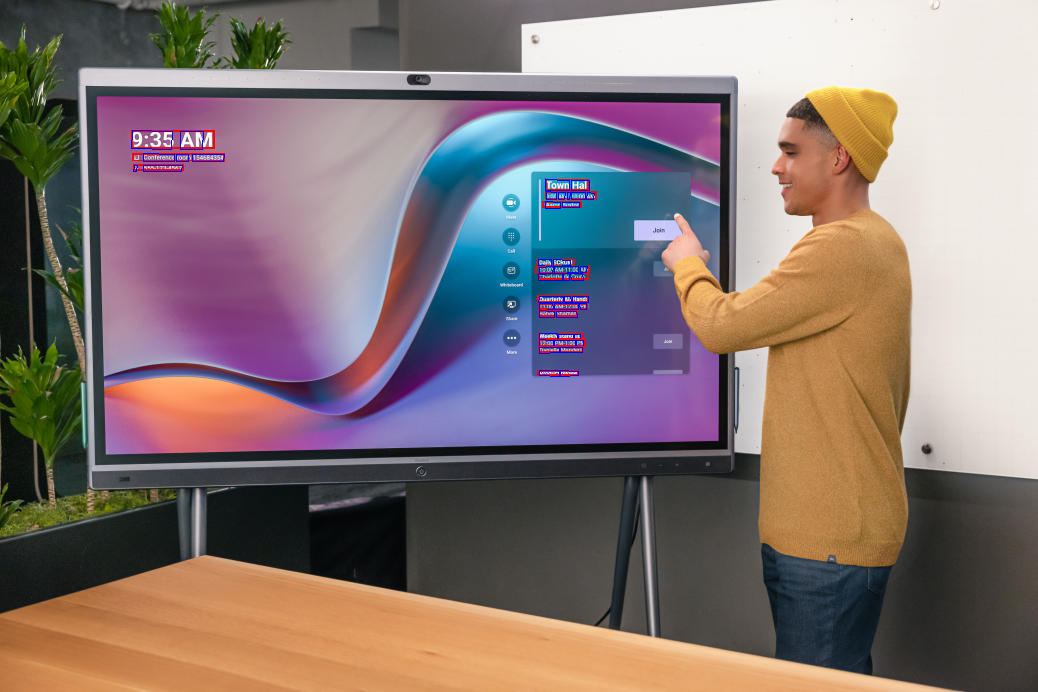

In [6]:
import os
from dotenv import load_dotenv
load_dotenv()

from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential
import requests
from PIL import Image, ImageDraw
from io import BytesIO

# Set the values of your computer vision endpoint and computer vision key
# as environment variables:
try:
    endpoint = os.environ["AZURE_VISION_ENDPOINT"]
    key = os.environ["AZURE_VISION_KEY"]
except KeyError:
    print("Missing environment variable 'AZURE_VISION_KEY' or 'AZURE_VISION_ENDPOINT")
    print("Set them before running this sample.")


# Create an Image Analysis client
client = ImageAnalysisClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(key)
)

image_url = "https://learn.microsoft.com/azure/ai-services/computer-vision/media/quickstarts/presentation.png"

# Get a caption for the image. This will be a synchronously (blocking) call.
result = client.analyze_from_url(
    image_url=image_url,
    visual_features=[VisualFeatures.CAPTION, VisualFeatures.READ],
    gender_neutral_caption=True,  # Optional (default is False)
)

# Download and open the image
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
draw = ImageDraw.Draw(image)

print("Image analysis results:")
# Print caption results to the console
print(" Caption:")
if result.caption is not None:
    print(f"   '{result.caption.text}', Confidence {result.caption.confidence:.4f}")

# Print text (OCR) analysis results and draw bounding boxes
print(" Read:")
if result.read is not None:
    for block in result.read.blocks:
        for line in block.lines:
            # print(f"   Line: '{line.text}', Bounding box {line.bounding_polygon}")
            # Draw the bounding box for each line
            points = [(point.x, point.y) for point in line.bounding_polygon]
            draw.polygon(points, outline='red', width=2)
            
            for word in line.words:
                # print(f"     Word: '{word.text}', Bounding polygon {word.bounding_polygon}, Confidence {word.confidence:.4f}")
                # Draw the bounding box for each word
                points = [(point.x, point.y) for point in word.bounding_polygon]
                draw.polygon(points, outline='blue', width=1)

# Save or display the image with bounding boxes
# image.save('output_image_with_boxes.png')
image